# Figure 6: Vibration of type II afferents 

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

from directory_paths import SAVE_DIR
from train.train_model_utils import *
import pandas as pd
from utils.muscle_names import MUSCLE_NAMES
from utils.analysis_plots_helper import *

In [2]:
original_hex_biceps = "#FF3B30"
original_hex_tri = "#00C7BE"
MARKER_LIST = ["o", "X", "^", "p", "d", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]

aff_Ia_color = "#762A83"
aff_II_color = "#DE8F05"
colors_aff_dict = {"i_a": aff_Ia_color, "ii": aff_II_color}

set_publication_style()

Load the following data for figure 5:
- 'vib_vary_multipleFs_vib_ii_only'
-  'vib_vary_multipleFs_vib_ii'
-  'vib_vary_multipleFs_vib_ia_only' 

for all vib ranges
coef_seeds_to_load = None
train_seeds_to_load = ['0','1','2','9']

In [3]:
### Load directly from downloaded figure data if available 
num_vib_muscles = 2
num_cols = 9

## Uncomment for each plot
# test_exp_dir = "vib_vary_multipleFs_vib_ia_only"
# test_exp_dir = "vib_vary_multipleFs_vib_ii"
test_exp_dir = "vib_vary_multipleFs_vib_ii_only"
df_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs", 
    f"df_all_vib_vary_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5")


### Or load from vibration experiments directly
n_aff = 5
task = "letter_reconstruction_joints"
## For pre-trained models downloaded
coef_seeds_to_load = None # to use all available
train_seeds_to_load = ['0','1','2','9']

model_path = os.path.join(
    SAVE_DIR,
    f"trained_models/experiment_causal_flag-pcr_optimized_linear_extended_{n_aff}_{n_aff}_{task}/",
)
INPUT_DATA = "ES3D"
PATH_TO_SAVE = model_path + "/" + "test" + "/" + INPUT_DATA + "/" + test_exp_dir
# coef_seeds_to_load = [0,1,2,3,4]
# # coef_seeds_to_load = None # to use all available
# train_seeds_to_load = ['0','1','2','3']

vib_muscles = None # to load all available
vib_range = None

columns_to_load = ["vib_freq", "vib_muscles", "trial", "elbow_angle", "vib_angle_diff_elbow"]

path_save = model_path + "/plots/" + test_exp_dir
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("created directory ", path_save)

created directory  /media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_multipleFs_vib_ii_only


# Load data

In [4]:
# df_file_path = "none"
loaded_from_hdf = False

# Load data from hdf5 file if it exists 
if os.path.exists(df_file_path):
    print("loading df_all from ", df_file_path)
    df_all = pd.read_hdf(df_file_path, key="df", mode="r")
    loaded_from_hdf = True
else:
    df_all = load_vibration_data(
        model_path=model_path,
        test_exp_dir=test_exp_dir,
        vib_muscles=vib_muscles,
        vib_range=vib_range,
        columns_to_load=columns_to_load,
        coef_seeds_to_load=coef_seeds_to_load,
        train_seeds_to_load=train_seeds_to_load,
        input_data=INPUT_DATA,
        sample_rate=SAMPLE_RATE,
        exact_vib_muscles=True
    )

loading df_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/df_all_vib_vary_vib_vary_multipleFs_vib_ii_only_2Muscles_numCols-9.h5


In [5]:
# keep only rows with vib_muscles_str = TRI or BIC
df_all_f = df_all[df_all["vib_muscles_str"].isin(["TRI", "BIC"])]

# remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
df_all_f = df_all_f.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "vib_freq", "trial"], keep="first")

# check data
# summary = summarize_dataframe(df_all_f)
# print(summary)

df_all = df_all_f

In [6]:
# save df
if not loaded_from_hdf:
    num_cols = len(df_all.columns)
    num_vib_muscles = len(df_all["vib_muscles_str"].unique())
    df_file_path = model_path + f"/df_all_vib_vary_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
    # save df_all to h5 file
    df_all.to_hdf(df_file_path, key="df", mode="w")
    print("saved df_all to ", df_file_path)


In [7]:
unique_seeds = df_all["coef_seed"].unique()
unique_seeds.sort()
seed_marker_map = {seed: MARKER_LIST[i] for i, seed in enumerate(unique_seeds)}
df_all["vib_muscles_str"].unique()

array(['TRI', 'BIC'], dtype=object)

In [8]:
path_save

'/media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_multipleFs_vib_ii_only'

# Plots
- Plot angle diff vs vib freq for all models. For vib only Ia, only II or all vib_freqs 0, 10, 20 ,..., 190
- Plot FR vs vib_freq for all afferents (type Ia and II) bic long and tri lat for coef seed = 1, train_seed = 0. Averaged over all trials

## Fig 5 C

saved as  mean_vib_angle_diff_vsfreq_TRI_all_affColor_per_None.svg


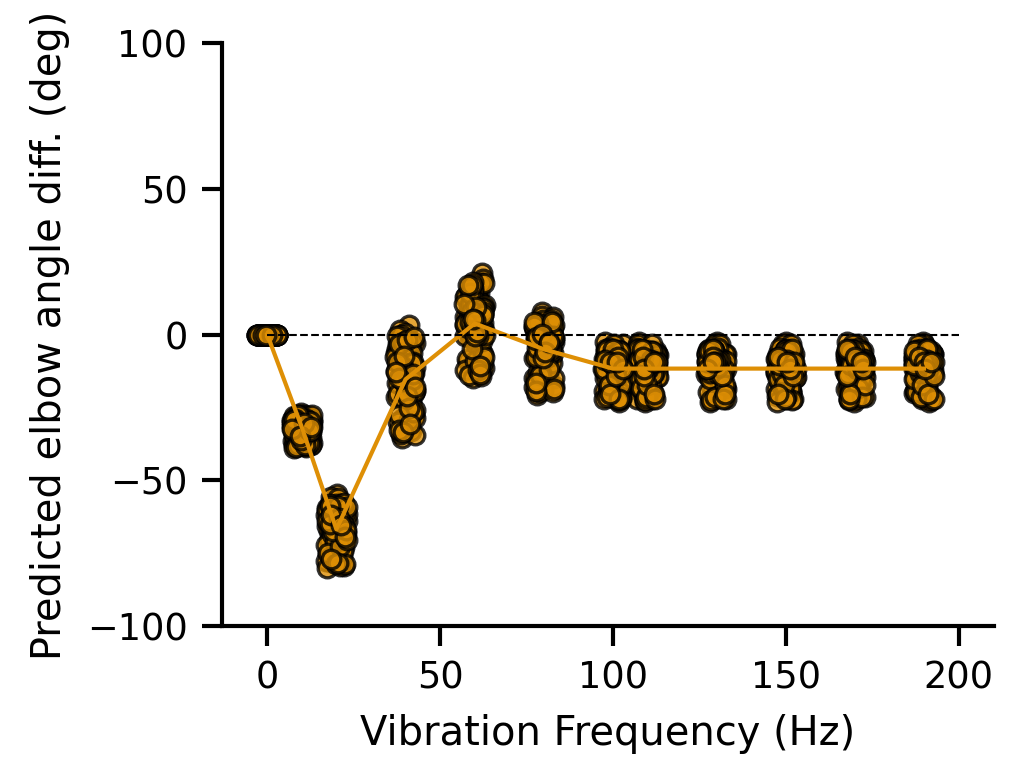

saved as  mean_vib_angle_diff_vsfreq_BIC_all_affColor_per_None.svg


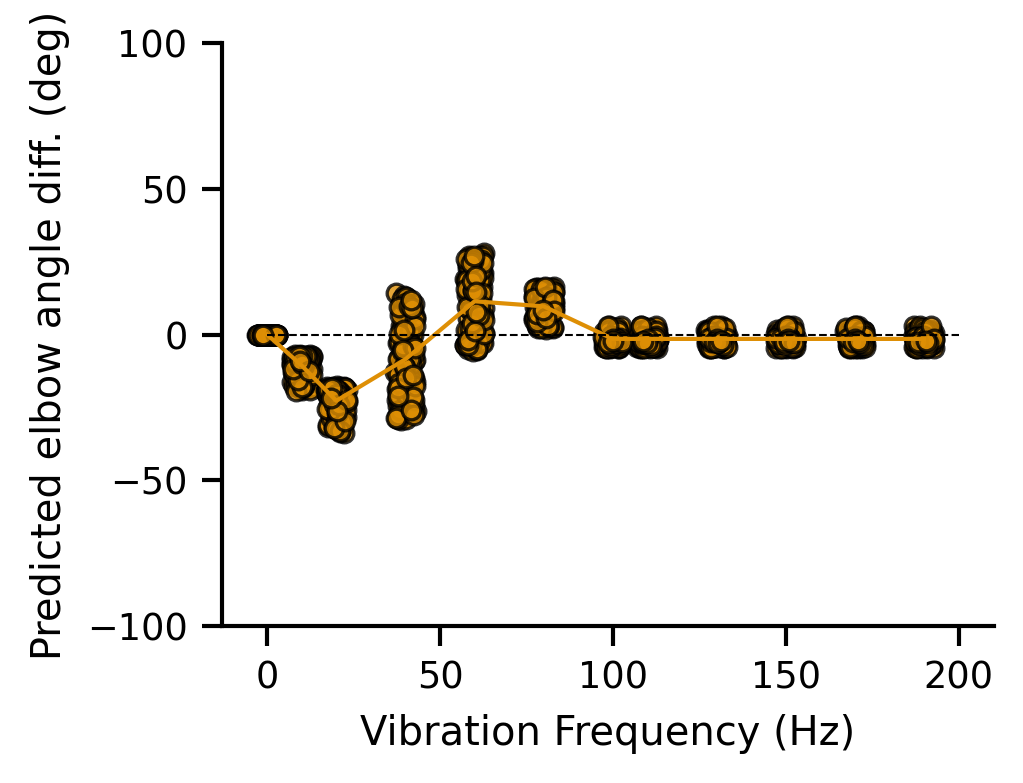

In [9]:
ylim = 100
# vib_muscles_str = 'TRI'
vib_m_str_to_plot = df_all["vib_muscles_str"].unique()
for vib_muscles_str in vib_m_str_to_plot:
    df_f = df_all[df_all["vib_muscles_str"] == vib_muscles_str]
    if "TRI" in vib_muscles_str:
        color = original_hex_tri
    elif "BIC" in vib_muscles_str:
        color = original_hex_biceps
    elif "ANC" in vib_muscles_str:
        color = original_hex_tri
    elif "BRA" in vib_muscles_str:
        color = original_hex_biceps
    else:
        color = "gray"

    if test_exp_dir == "vib_vary_multipleFs_vib_ia_only":
        color = aff_Ia_color
        plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all_affColor","vib_angle_diff_elbow", None, ylim=ylim)
    elif test_exp_dir == "vib_vary_multipleFs_vib_ii_only":
        color = aff_II_color
        plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all_affColor","vib_angle_diff_elbow", None, ylim=ylim) 
    elif test_exp_dir == "vib_vary_multipleFs_vib_ii":
        plot_angleOffset_vs_vibration(df_f, path_save, color, vib_muscles_str+"_all","vib_angle_diff_elbow", None, ylim=ylim)

## Fig 5 b)

In [10]:
num_vib_muscles = 2
num_cols = 10
train_seed = '0'
test_exp_dir = "vib_vary_multipleFs_vib_ii"
df_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs", 
    f"df_train-seed-{train_seed}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5")

PATH_TO_SAVE = model_path + "/" + "test" + "/" + INPUT_DATA + "/" + test_exp_dir

coef_seeds_to_load = None
train_seeds_to_load = ['0','1','2','9']

columns_to_load = ["vib_freq", "vib_muscles", "trial", "elbow_angle", "vib_angle_diff_elbow"]
columns_to_load = columns_to_load + ["inputs_vib"]

path_save = model_path + "/plots/" + test_exp_dir
if not os.path.exists(path_save):
    os.makedirs(path_save)
    print("created directory ", path_save)

created directory  /media/data16/adriana/ProprioPerception/0_Zenodo/trained_models/experiment_causal_flag-pcr_optimized_linear_extended_5_5_letter_reconstruction_joints//plots/vib_vary_multipleFs_vib_ii


In [11]:
# df_file_path = "none"
loaded_from_hdf = False

# Load data from hdf5 file if it exists 
if os.path.exists(df_file_path):
    print("loading df_all from ", df_file_path)
    df_all = pd.read_hdf(df_file_path, key="df", mode="r")
    loaded_from_hdf = True
else:
    df_all = load_vibration_data(
        model_path=model_path,
        test_exp_dir=test_exp_dir,
        vib_muscles=vib_muscles,
        vib_range=vib_range,
        columns_to_load=columns_to_load,
        coef_seeds_to_load=coef_seeds_to_load,
        train_seeds_to_load=train_seeds_to_load,
        input_data=INPUT_DATA,
        sample_rate=SAMPLE_RATE,
        exact_vib_muscles=True
    )

loading df_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/df_train-seed-0_vib_vary_multipleFs_vib_ii_2Muscles_numCols-10.h5


In [12]:
# keep only rows with vib_muscles_str = TRI or BIC
df_all_f = df_all[df_all["vib_muscles_str"].isin(["TRI", "BIC"])]

# remove rows with same coef_seed, train_seed, vib_musclse_str, vib_freq and trial
df_all_f = df_all_f.drop_duplicates(subset=["coef_seed", "train_seed", "vib_muscles_str", "vib_freq", "trial"], keep="first")

# summary = summarize_dataframe(df_all_f)
# print(summary)

df_all_no_nan = df_all_f.dropna(subset=["inputs_vib"])
# only keep rows with train_seed = 0
df_all_no_nan = df_all_no_nan[df_all_no_nan["train_seed"] == train_seed]
# summary = summarize_dataframe(df_all_no_nan)
# print(summary)

In [13]:
# save df
if not loaded_from_hdf:
    num_cols = len(df_all.columns)
    num_vib_muscles = len(df_all["vib_muscles_str"].unique())
    df_file_path = model_path + f"/df_train-seed-{train_seed}_{test_exp_dir}_{num_vib_muscles}Muscles_numCols-{num_cols}.h5"
    # save df_all to h5 file
    df_all_no_nan.to_hdf(df_file_path, key="df", mode="w")
    print("saved df_all to ", df_file_path)

### Channels response vs vib freq

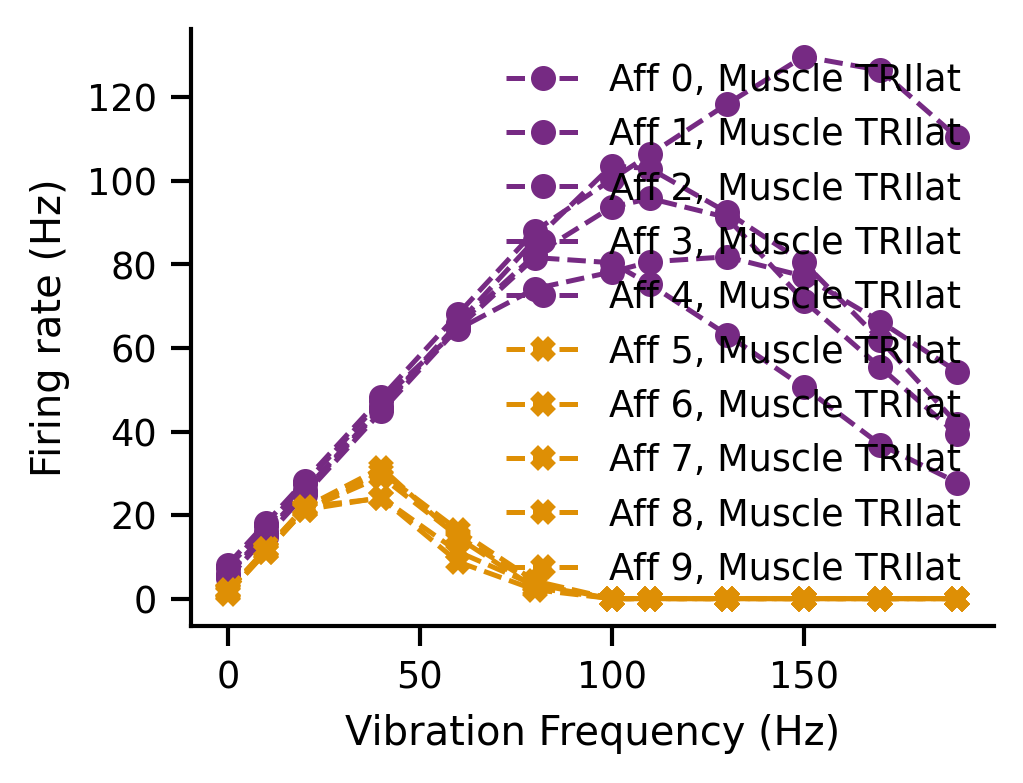

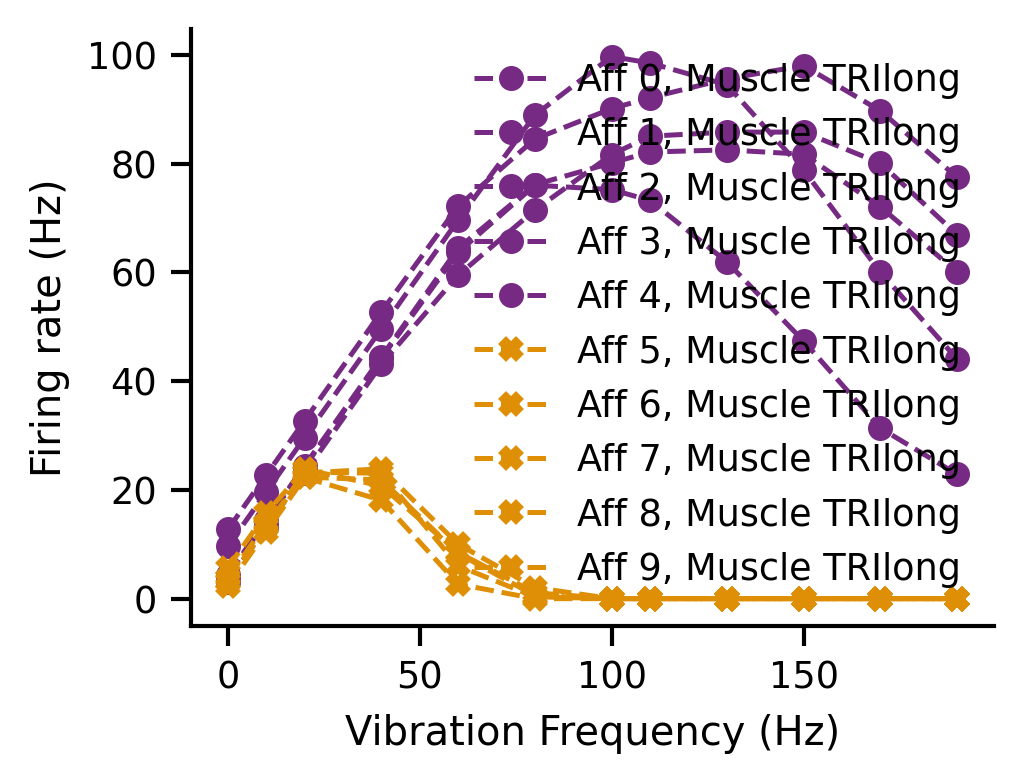

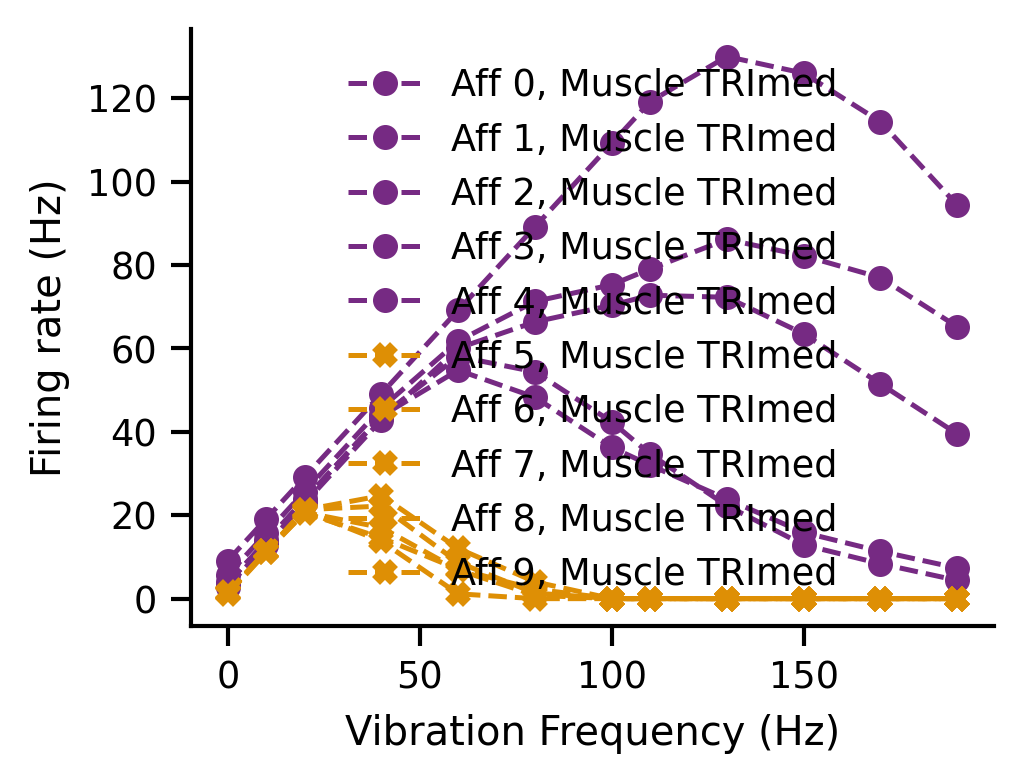

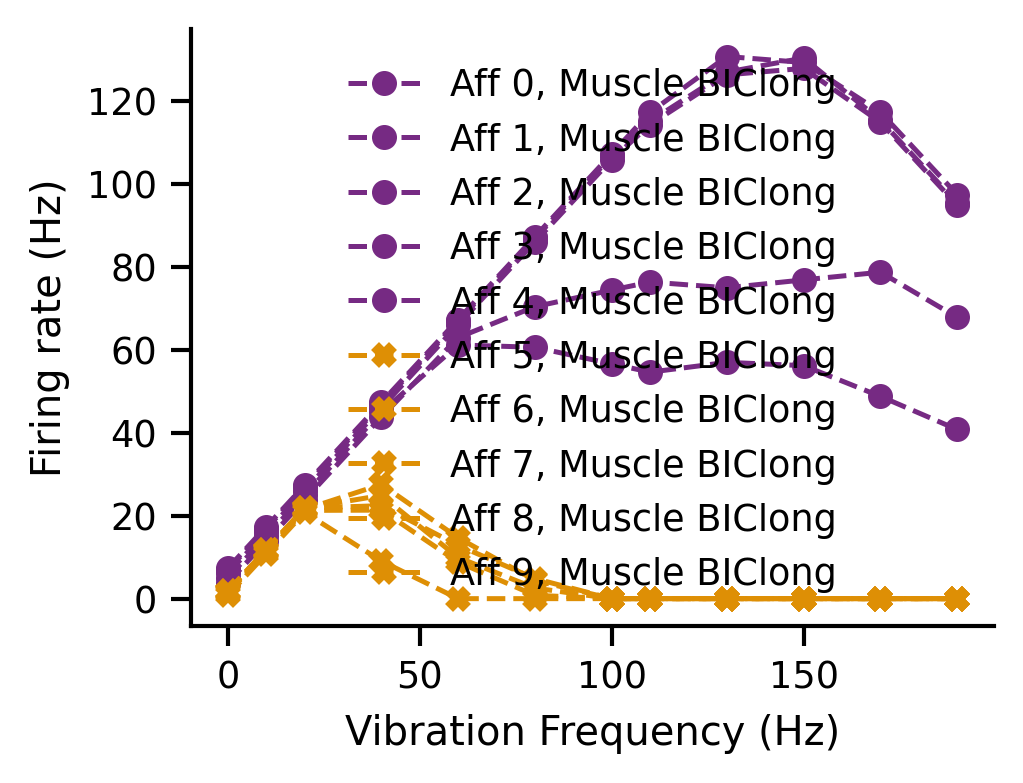

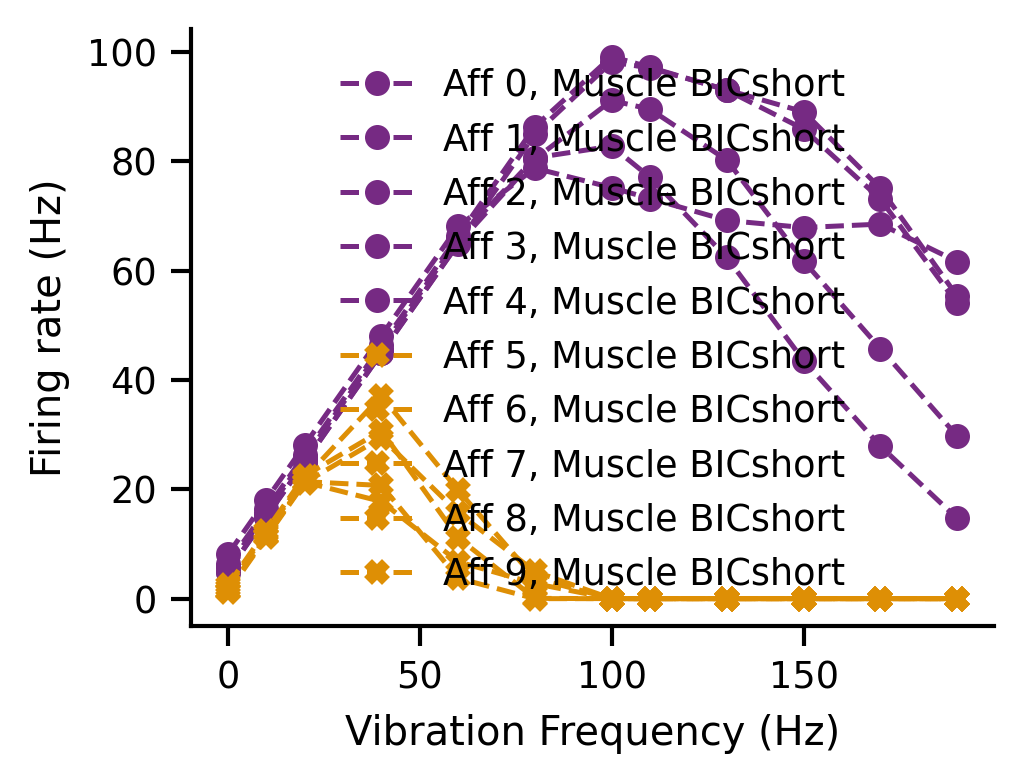

In [14]:
# type II afferents
aff_marker_map = {
    '0': "o",
    '1': "o",
    '2': "o",
    '3': "o",
    '4': "o",
    '5': "X",
    '6': "X",
    '7': "X",
    '8': "X",
    '9': "X",
} 
ls_map = None


colors = [aff_Ia_color, aff_Ia_color, aff_Ia_color, aff_Ia_color, aff_Ia_color, aff_II_color, aff_II_color, aff_II_color, aff_II_color, aff_II_color]

time_point = 500
channels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
channels_str = '0_1_2_3_4_5_6_7_8_9'
# df_f = df_all_no_nan[(df_all_no_nan["vib_muscles_str"] == 'TRI') & (df_all_no_nan["channels"] == channels_str) ]
df_f = df_all_no_nan[(df_all_no_nan["vib_muscles_str"] == 'TRI')]
muscle_names = ['TRIlat']
plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed=None, grad_color=original_hex_tri, suffix="all_seeds", save_path=path_save, seed_marker_map=aff_marker_map, ls_map=ls_map, colors=colors)
muscle_names = ['TRIlong']
plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed=None, grad_color=original_hex_tri, suffix="all_seeds", save_path=path_save, seed_marker_map=aff_marker_map, ls_map=ls_map, colors=colors)
muscle_names = ['TRImed']
plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed=None, grad_color=original_hex_tri, suffix="all_seeds", save_path=path_save, seed_marker_map=aff_marker_map, ls_map=ls_map, colors=colors)

# df_f = df_all_no_nan[(df_all_no_nan["vib_muscles_str"] == 'BIC') & (df_all_no_nan["channels"] == channels_str)]
df_f = df_all_no_nan[(df_all_no_nan["vib_muscles_str"] == 'BIC')]
muscle_names = ['BIClong']
plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed=None, grad_color=original_hex_biceps, suffix="all_seeds", save_path=path_save, seed_marker_map=aff_marker_map, ls_map=ls_map, colors=colors)
muscle_names = ['BICshort']
plot_vibration_vs_input(df_f, muscle_names, time_point, channels, per_seed=None, grad_color=original_hex_biceps, suffix="all_seeds", save_path=path_save, seed_marker_map=aff_marker_map, ls_map=ls_map, colors=colors)

## Fig 5 A) Cofficients


In [15]:
from utils.spindle_FR_helper import load_coefficients, get_sampled_coefficients

In [18]:
def get_coefs(config):
    """
        Returns the coefficients for the given configuration as a dictionary.
    """
    coefs_names = ["k_l", "k_v", "e_v", "k_a", "k_c", "max_rate", "frac_zero"]
    # load coefficients
    coefficients = {
        key: load_coefficients(config[key + "_coeff_path"]) for key in ["i_a", "ii"]
    }
    muscles = config["muscles"]
    num_coefficients = [config["num_i_a"], config["num_ii"]]
    sampled_coefficients = get_sampled_coefficients(
        config, num_coefficients, muscles, coefficients
    )
    # print(sampled_coefficients)
    
    all_coefs = {}
    for i, coeff_type in enumerate(["i_a", "ii"]):
        all_coefs[coeff_type] = {}
        for muscle in muscles:
            all_coefs[coeff_type][muscle] = {}
            muscle_idx = MUSCLE_NAMES.index(muscle)
            # print("muscle ", muscle, muscle_idx)
            # Iterate over coefficients for the given type
            sampled_coefficients_m = sampled_coefficients[coeff_type][muscle_idx]
            # print(sampled_coefficients_m)
            for coef_name in coefs_names:
                all_coefs[coeff_type][muscle][coef_name] = []
            for j in range(num_coefficients[i]):
                # print('aff ', j)
                idx = sum(num_coefficients[:i]) + j
                # Use the sampled coefficients for this muscle and coefficient type
                sampled_index = sampled_coefficients_m[j]
                # print("sampled idx ", sampled_index)
                for coef_name in coefs_names:
                    all_coefs[coeff_type][muscle][coef_name].append(
                        coefficients[coeff_type][muscle_idx][coef_name][sampled_index]
                    )
    return all_coefs
    

In [29]:
seeds = [0,1,2,3,4]
# vib_muscles = ["TRIlat", "TRImed", "TRIlong", "BICshort", "BIClong"]
vib_muscles = MUSCLE_NAMES
config = {
    "i_a_coeff_path": "../../data/extended_spindle_coefficients/i_a/linear/coefficients.csv",
    "ii_coeff_path": "../../data/extended_spindle_coefficients/ii/linear/coefficients.csv",
    "i_a_sampled_coeff_path": None ,
    "ii_sampled_coeff_path": None,
    "num_i_a":5,
    "num_ii":5,
    "muscles": vib_muscles,
    # "seed": seed
}

In [30]:
coeffs_seed = {}
for seed in seeds:
    config_seed = config.copy()
    config_seed["seed"] = seed
    all_coefs = get_coefs(config_seed)
    coeffs_seed[seed] = all_coefs

sampled coef path ../../data/extended_spindle_coefficients/i_a/linear/sampled_coefficients_i_a_5_0.csv
Loading samp coeffs from  ../../data/extended_spindle_coefficients/i_a/linear/sampled_coefficients_i_a_5_0.csv
sampled coef path ../../data/extended_spindle_coefficients/ii/linear/sampled_coefficients_ii_5_0.csv
Loading samp coeffs from  ../../data/extended_spindle_coefficients/ii/linear/sampled_coefficients_ii_5_0.csv
sampled coef path ../../data/extended_spindle_coefficients/i_a/linear/sampled_coefficients_i_a_5_1.csv
Loading samp coeffs from  ../../data/extended_spindle_coefficients/i_a/linear/sampled_coefficients_i_a_5_1.csv
sampled coef path ../../data/extended_spindle_coefficients/ii/linear/sampled_coefficients_ii_5_1.csv
Loading samp coeffs from  ../../data/extended_spindle_coefficients/ii/linear/sampled_coefficients_ii_5_1.csv
sampled coef path ../../data/extended_spindle_coefficients/i_a/linear/sampled_coefficients_i_a_5_2.csv
Loading samp coeffs from  ../../data/extended_spi

In [21]:
# save coefficients in a file and create a unified DataFrame
coeffs_file_path = os.path.join(
    SAVE_DIR,
    "data_for_figs",
    "coefficients_all.hdf5")

loaded_from_hdf = False
if os.path.exists(coeffs_file_path):
    print("loading df_all from ", coeffs_file_path)
    coeffs_df = pd.read_hdf(coeffs_file_path, key="df", mode="r")
    loaded_from_hdf = True
else:
    all_rows = []
    for seed, aff_types in coeffs_seed.items():
        for aff_type, muscles in aff_types.items():
            # Create output directory if it doesn't exist
            output_dir = f"../data/extended_spindle_coefficients/{aff_type}/linear"
            os.makedirs(output_dir, exist_ok=True)
            
            # Create a DataFrame for this specific seed and aff_type
            csv_rows = []
            
            # Process each muscle and its coefficients
            for muscle_name, coefficients in muscles.items():
                # Create a single row with muscle name and array values for coefficients
                row = {
                    'muscle_name': muscle_name
                }
                
                # Add each coefficient as a JSON string of the array
                for coef_name, values in coefficients.items():
                    row[coef_name] = json.dumps(values)
                
                csv_rows.append(row)
                
                # For the unified DataFrame, create individual rows for each set of values
                num_values = len(next(iter(coefficients.values())))
                for i in range(num_values):
                    unified_row = {
                        'seed': seed,
                        'aff_type': aff_type,
                        'muscle_name': muscle_name,
                        'aff': i
                    }
                    unified_row.update({coef_name: values[i] for coef_name, values in coefficients.items()})
                    all_rows.append(unified_row)
            
            # Create and save the CSV for this seed and aff_type
            seed_df = pd.DataFrame(csv_rows)
            output_file = f"{output_dir}/coefficients_{aff_type}_5_{seed}.csv"
            if not os.path.exists(output_file):
                seed_df.to_csv(output_file, index=False)
                print(f"Saved: {output_file}")

    # Create the unified DataFrame
    coeffs_df = pd.DataFrame(all_rows)


loading df_all from  /media/data16/adriana/ProprioPerception/0_Zenodo/data_for_figs/coefficients_all.hdf5


In [22]:
# save coeffs_df
if not loaded_from_hdf:
    coeffs_file_path = f"{model_path}coefficients_all.hdf5"
    coeffs_df.to_hdf(coeffs_file_path, key="df", mode="w")
    print("saved to ", coeffs_file_path)

In [24]:
path_save = f"{model_path}/plots/coefficients/"
# Create the output directory if it doesn't exist
os.makedirs(path_save, exist_ok=True)

In [27]:
MS = 20 

def plot_muscle_coefficients(coeffs_df, muscles, path_save="", 
                             colors={'i_a': 'tab:blue', 'ii': 'tab:orange'}, 
                             markers=['o', 's', '^', 'D', 'v']):  
    """
    Plot muscle coefficients for multiple muscles with different markers.
    
    Parameters:
    -----------
    coeffs_df : pandas.DataFrame
        DataFrame containing coefficient data
    muscles : list of str
        List of muscle names to plot
    path_save : str, optional
        Path to save the output figure
    colors : dict, optional
        Dictionary specifying colors for 'i_a' and 'ii' afferent types
    markers : list, optional
        List of markers to differentiate muscles
    """
    x_ticks = ['k_l', 'k_v', 'k_a', 'k_c']
    x_tick_indices = np.arange(len(x_ticks))
    bar_width = 0.3
    
    # Create figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(BASE_FIG_SIZE_1COL[0] * 1.5, BASE_FIG_SIZE_1COL[1]), 
                           gridspec_kw={'width_ratios': [3, 1]})

    # Assign unique markers per muscle
    muscle_marker_map = {muscle: markers[i] for i, muscle in enumerate(muscles)}
    
    # Loop through each muscle
    for muscle in muscles:
        muscle_df = coeffs_df[coeffs_df['muscle_name'] == muscle]
        unique_seeds = muscle_df['seed'].unique()
        seed_jitter_map = {seed: (idx - len(unique_seeds)/2) * 0.03 for idx, seed in enumerate(sorted(unique_seeds))}
        
        for i, x_tick in enumerate(x_ticks):
            for aff_type in ['i_a', 'ii']:
                data = muscle_df[muscle_df['aff_type'] == aff_type]
                values = data[x_tick]
                seeds = data['seed']
                jitter = np.array([seed_jitter_map[seed] for seed in seeds])

                ax[0].scatter(
                    np.ones(len(values)) * (i - (bar_width / 2 if aff_type == 'i_a' else -bar_width / 2)) + jitter,
                    values, color=colors[aff_type], alpha=0.7, s=MS,
                    marker=muscle_marker_map[muscle], label=f"{muscle} ({aff_type})" if i == 0 else "_nolegend_",
                    edgecolor="black"
                )
    
    ax[0].set_xticks(x_tick_indices)
    ax[0].set_xticklabels([f'${x_tick}$' for x_tick in x_ticks])
    ax[0].set_ylabel('Coefficient Value')
    ax[0].set_title('Ia vs II Coefficients')
    ax[0].set_ylim(-5, 80)
    
    # Reduce number of y-ticks
    y_ticks = ax[0].get_yticks()
    ax[0].set_yticks(y_ticks[1::2])
    
    # Legend with markers
    legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=aff_Ia_color, 
           label='Ia', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=aff_II_color, 
           label='II', markersize=10)
    ]
    
    legend_elements += [plt.Line2D([0], [0], marker=marker, color='w', 
                                  markerfacecolor='black', markersize=10, label=muscle) 
                       for muscle, marker in muscle_marker_map.items()]
    
    
    ax[0].legend(handles=legend_elements, title="Muscles")

    # Second subplot: max_rate
    for muscle in muscles:
        muscle_df = coeffs_df[coeffs_df['muscle_name'] == muscle]
        unique_seeds = muscle_df['seed'].unique()
        seed_jitter_map = {seed: (idx - len(unique_seeds)/2) * 0.01 for idx, seed in enumerate(sorted(unique_seeds))}
        
        for aff_type in ['i_a', 'ii']:
            data = muscle_df[muscle_df['aff_type'] == aff_type]
            values = data['max_rate']
            seeds = data['seed']
            jitter = np.array([seed_jitter_map[seed] for seed in seeds])

            ax[1].scatter(
                np.ones(len(values)) * (-bar_width / 2 if aff_type == 'i_a' else bar_width / 2) + jitter,
                values, color=colors[aff_type], alpha=0.7, s=MS,
                marker=muscle_marker_map[muscle],
                edgecolor="black"
            )

    ax[1].set_ylim(-5, 200)
    ax[1].set_xticks([0])
    ax[1].set_xticklabels(['$rate_{max}$'])
    
    # Reduce number of y-ticks
    y_ticks = ax[1].get_yticks()
    ax[1].set_yticks(y_ticks[1::2])

    # Adjust layout and save
    plt.tight_layout()
    if path_save:
        muscles_str = "_".join(muscles)
        plt.savefig(f"{path_save}i_a_vs_ii_{len(muscles)}_muscles_{muscles_str}.svg")
        plt.savefig(f"{path_save}i_a_vs_ii_{len(muscles)}_muscles_{muscles_str}.png")
    
    return fig

def plot_all_muscles(coeffs_df, muscles_to_plot, path_save="",  aff_colors_dict=colors_aff_dict):
    """
    Plot coefficients for multiple muscles
    """
    figures = []
    
    for muscle in muscles_to_plot:
        fig = plot_muscle_coefficients(coeffs_df, [muscle], path_save, aff_colors_dict)
        figures.append(fig)
        plt.close(fig)  # Close to prevent display in notebooks
    
    return figures


def plot_multiple_muscles(coeffs_df, muscles_to_plot, path_save="", aff_colors_dict=colors_aff_dict):
    """
    Plot coefficients for multiple muscles
    """
    figures = []
    
    for muscles in muscles_to_plot:
        fig = plot_muscle_coefficients(coeffs_df, muscles, path_save,aff_colors_dict)
        figures.append(fig)
        # plt.close(fig)  # Close to prevent display in notebooks
    
    return figures

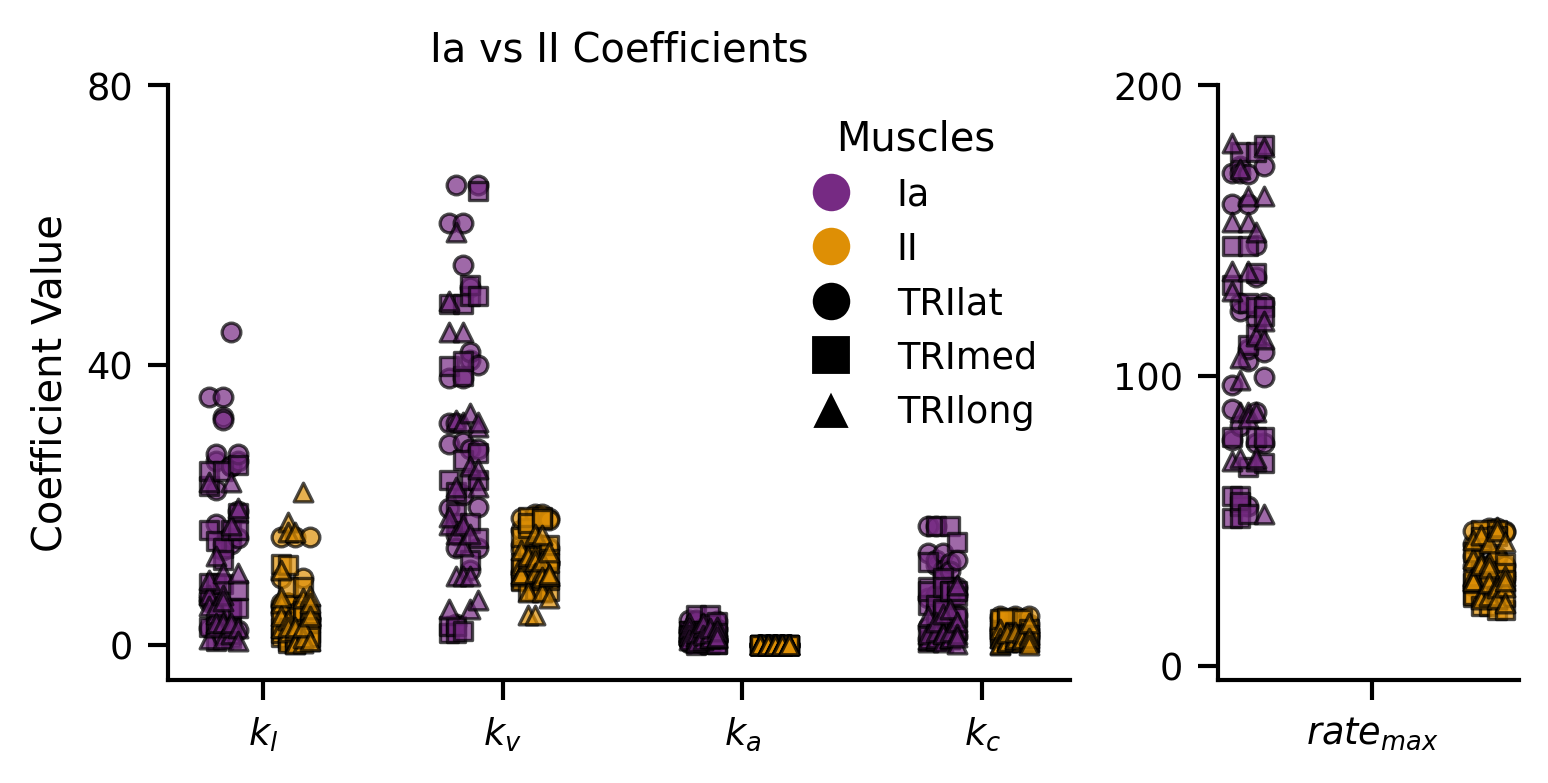

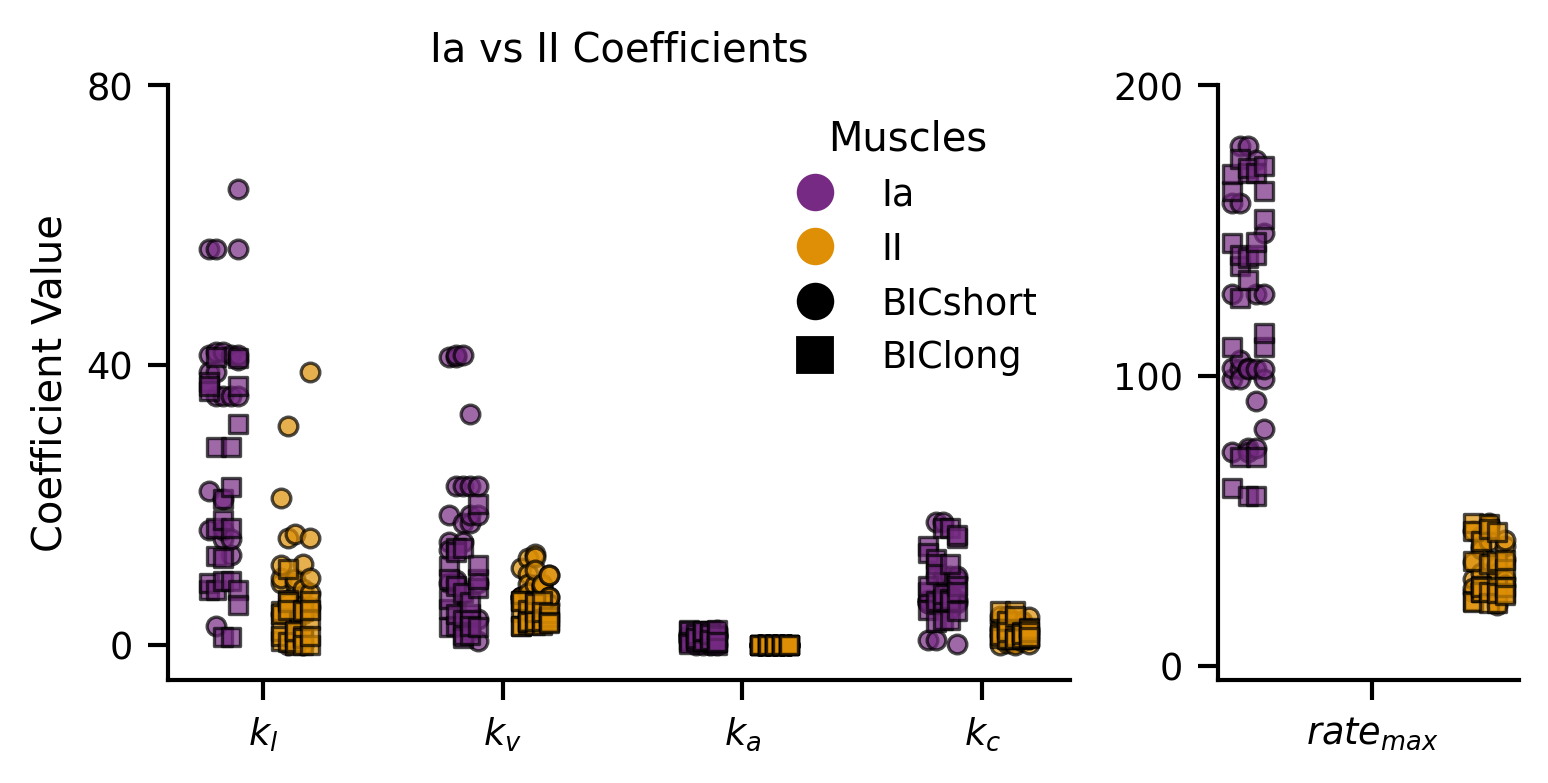

In [28]:
# All tri and all bic at a time 
muscles_to_plot = [["TRIlat", "TRImed", "TRIlong",], ["BICshort", "BIClong"]]
figs = plot_multiple_muscles(coeffs_df, muscles_to_plot, path_save, colors_aff_dict)

### Extra plots if wanted
# Individual muscles at a time
# muscles_to_plot = ["TRIlat", "TRImed", "TRIlong", "BICshort", "BIClong"]
# figs = plot_all_muscles(coeffs_df, muscles_to_plot, path_save, colors_aff_dict)

# # per seed
# # muscles_to_plot = ["TRIlat", "TRImed", "TRIlong", "BICshort", "BIClong"]
# muscles_to_plot = [["TRIlat", "TRImed", "TRIlong",], ["BICshort", "BIClong"]]
# seeds = coeffs_df['seed'].unique()
# for seed in seeds:
#     coeffs_df_seed = coeffs_df[coeffs_df['seed'] == seed]
#     # figs = plot_all_muscles(coeffs_df_seed, muscles_to_plot, path_save=f"{path_save}seed_{seed}_",aff_colors_dict=colors_aff_dict)
#     figs = plot_multiple_muscles(coeffs_df_seed, muscles_to_plot, path_save=f"{path_save}seed_{seed}_",aff_colors_dict=colors_aff_dict)